In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
fc_blocksize_sweep = pd.read_csv("data/FC_blocksize_sweep.csv")

In [10]:
def create_latency_plot(file_in, file_name_out, title):
    df = pd.read_csv(file_in)
    sns.lineplot(data=df, x='Blocksize', y='Compute Latency')
    plt.title(title)
    plt.xlabel("Block Size")
    plt.ylabel("Latency")
    plt.show()

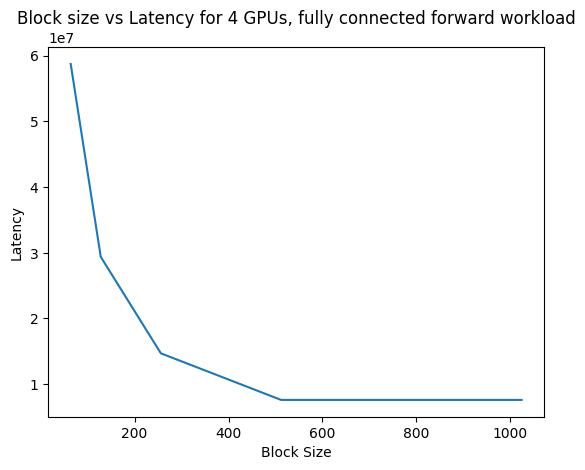

In [12]:
create_latency_plot("data/FC_blocksize_sweep.csv", "hi", "Block size vs Latency for 4 GPUs, fully connected forward workload")

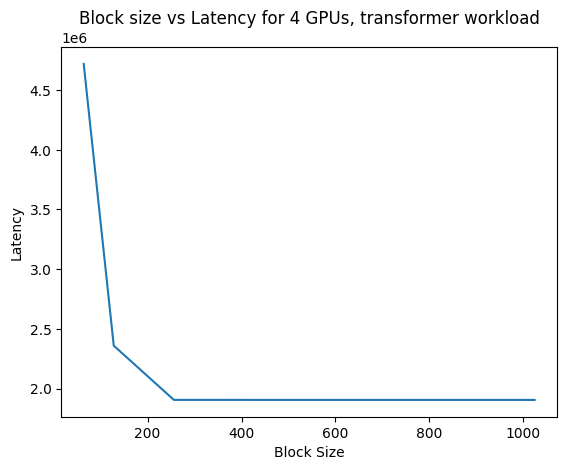

In [13]:
create_latency_plot("data/TF_blocksize_sweep.csv", "hi", "Block size vs Latency for 4 GPUs, transformer workload")